### Notebook Where I setup the station to study different clusters

In [6]:
import pandas as pd
#read
df = pd.read_csv('DMQlocs.csv')
print(df)

   Code   Lat    Lon  Depth        Date
0   A01 -17.4  -38.4    917  7309300410
1   A06  49.7   54.7    860  7607021052
2   A07  24.0   53.7    900  7607020311
3   A08 -28.0  -28.1    940  7705161052
4   A09 -37.8  -30.8    975  7704161958
5   A11   9.3   17.5   1200  7706180501
6   A14 -28.7  -33.9    880  7305281853
7   A16   6.8    5.1   1105  7210081524
8   A17  23.1  -18.0    861  7211070852
9   A18  18.6   34.7    882  7301052250
10  A20  21.7  -41.0   1055  7205151718
11  A24 -36.8  -38.9    980  7706121817
12  A25  34.4   59.3    898  7706092015
13  A26  12.2   10.2   1135  7706201450
14  A27  22.5   18.5   1059  7705160001
15  A30  11.8  -34.3    921  7205170042
16  A33   6.9  117.8    887  7210111935
17  A34   7.0   -9.3    932  7206141834
18  A40  -1.6  -10.9    886  7306272348
19  A41  13.9  -26.8    953  7206081616
20  A42  22.7  -53.5   1004  7305030152
21  A44  51.9   57.1    956  7405190309
22  A50   9.4  -51.6    835  7304300105
23  A51   8.8   15.7    888  7402180835


## Define the Apollo stations coordinates

### Assuming that each DeepMoonQuake is at the origin, compute the relative distance and azimuth of each station

In [ ]:
import math

def spherical_distance_and_azimuth(lat1, lon1, lat2, lon2, radius=1737400):
    """
    Compute the great-circle distance and azimuths between two points 
    on the surface of a sphere (e.g. the Moon) using spherical trigonometry.

    Parameters
    ----------
    lat1 : float
        Latitude of the first point (e.g. station) in decimal degrees.
    lon1 : float
        Longitude of the first point in decimal degrees.
    lat2 : float
        Latitude of the second point (e.g. event) in decimal degrees.
    lon2 : float
        Longitude of the second point in decimal degrees.
    radius : float, optional
        Radius of the sphere in meters. Default is 1737400 meters (mean radius of the Moon).

    Returns
    -------
    distance : float
        Great-circle distance between the two points in meters.
    azimuth : float
        Azimuth (forward azimuth) from the first point to the second, in degrees.
        Measured clockwise from north (0° to 360°).
    back_azimuth : float
        Back-azimuth from the second point to the first, in degrees.
        Measured clockwise from north (0° to 360°).

    Notes
    -----
    - Uses the haversine formula for the great-circle distance:
        a = sin²(Δφ/2) + cos φ₁ * cos φ₂ * sin²(Δλ/2)
        c = 2 * atan2(√a, √(1−a))
        d = R * c

    - Azimuth is computed using:
        θ = atan2( sin(Δλ) * cos φ₂,
                   cos φ₁ * sin φ₂ − sin φ₁ * cos φ₂ * cos(Δλ) )

    - All angle inputs and outputs are in decimal degrees.
    - Treats the sphere as perfectly spherical — no ellipsoid flattening.

    Example
    -------
    >>> d, az, baz = spherical_distance_and_azimuth(0, 0, 10, 10)
    >>> print(f"Distance: {d/1000:.1f} km, Azimuth: {az:.1f}°, Back-Azimuth: {baz:.1f}°")

    """
    # Convert degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    
    # Differences in coordinates
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Haversine formula for central angle
    a = (math.sin(dlat / 2))**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * (math.sin(dlon / 2))**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * c

    # Forward azimuth calculation
    y = math.sin(dlon) * math.cos(lat2_rad)
    x = math.cos(lat1_rad) * math.sin(lat2_rad) - math.sin(lat1_rad) * math.cos(lat2_rad) * math.cos(dlon)
    azimuth = (math.degrees(math.atan2(y, x)) + 360) % 360

    # Back-azimuth calculation (from second point to first)
    y_back = -math.sin(dlon) * math.cos(lat1_rad)
    x_back = math.cos(lat2_rad) * math.sin(lat1_rad) - math.sin(lat2_rad) * math.cos(lat1_rad) * math.cos(dlon)
    back_azimuth = (math.degrees(math.atan2(y_back, x_back)) + 360) % 360

    return distance, azimuth, back_azimuth


#DEFINE THE STATIONS

stations = {}
codes = ['AP12', 'AP14', 'AP15', 'AP16']
lats=[-3.001,-3.64,26.13,-8.96]
lons =[336.57,342.52,3.63,15.49]
for i in range(len(codes)):
    stations[codes[i]] = (lats[i],lons[i])
    

# Station-event loop
for code, (lat, lon) in stations.items():
    print(f"Station {code} is located at latitude {lat} and longitude {lon}.")
    
    for index, row in df.iterrows():
        SourceID = row['Code']
        latitude = row['Lat']
        longitude = row['Lon']
        
        dist, az, baz = spherical_distance_and_azimuth(lat, lon, latitude, longitude)
        print(f"Distance from station {code} to event {SourceID} is {dist/1000:.0f} km.")
        print(f"Azimuth from station {code} to event {SourceID} is {az:.0f} degrees.")
        
        with open(f"{code}.txt", "a") as f:
            f.write(f"{SourceID} {row['Depth']} {dist/1000:.0f} {az:.0f}\n")
            print(f"Written to {code}.txt")
        print("--------------------------------------------------")
        

Station AP12 is located at latitude -3.001 and longitude 336.57.
Distance from station AP12 to event A01 is 624 km.
Azimuth from station AP12 to event A01 is 225 degrees.
Written to AP12.txt
--------------------------------------------------
Distance from station AP12 to event A06 is 2567 km.
Azimuth from station AP12 to event A06 is 39 degrees.
Written to AP12.txt
--------------------------------------------------
Distance from station AP12 to event A07 is 2411 km.
Azimuth from station AP12 to event A07 is 65 degrees.
Written to AP12.txt
--------------------------------------------------
Distance from station AP12 to event A08 is 770 km.
Azimuth from station AP12 to event A08 is 190 degrees.
Written to AP12.txt
--------------------------------------------------
Distance from station AP12 to event A09 is 1075 km.
Azimuth from station AP12 to event A09 is 190 degrees.
Written to AP12.txt
--------------------------------------------------
Distance from station AP12 to event A11 is 1292 k

## Read an plot the DMQ stacks

## Get the arrival times of the DMQ stacks

In [ ]:
import numpy as np
import pandas as pd
# Read the CSV file
df = pd.read_csv("stations.csv", index_col=0)
print(df)

        S12     S14    S15     S16  Ref_Hours  Ref_Minutes  Ref_Seconds
A01  192.40  194.80  251.0  239.70          4           10        58.84
A06  259.40  258.20  191.6  235.20         10           52        25.31
A07  251.20  242.00  191.4  198.80          3           11        24.18
A08  173.20  174.00    NaN  189.90         10           52        29.35
A09  167.50  159.70    NaN     NaN         19           58         4.27
A11     NaN  192.20  173.2     NaN          5            1        16.06
A14  149.70  152.50    NaN  191.00         18           53        12.96
A16     NaN  184.50  185.4  185.40         15           24        35.48
A17  143.00  141.90  133.3  178.00          8           52         7.94
A18  229.20  216.20  188.5  188.50         22           50        30.86
A20     NaN  179.90  174.3  204.50         17           18         7.15
A24  196.70  198.00    NaN     NaN         18           17        38.54
A25  241.30  242.10  179.2  200.70         20           15      

Arrival time: 3.2066666666666666 min
1973-09-30T04:06:09.827000Z
1973-09-30T04:10:58.000000Z 1973-09-30T04:06:09.827000Z
4.802883333333333


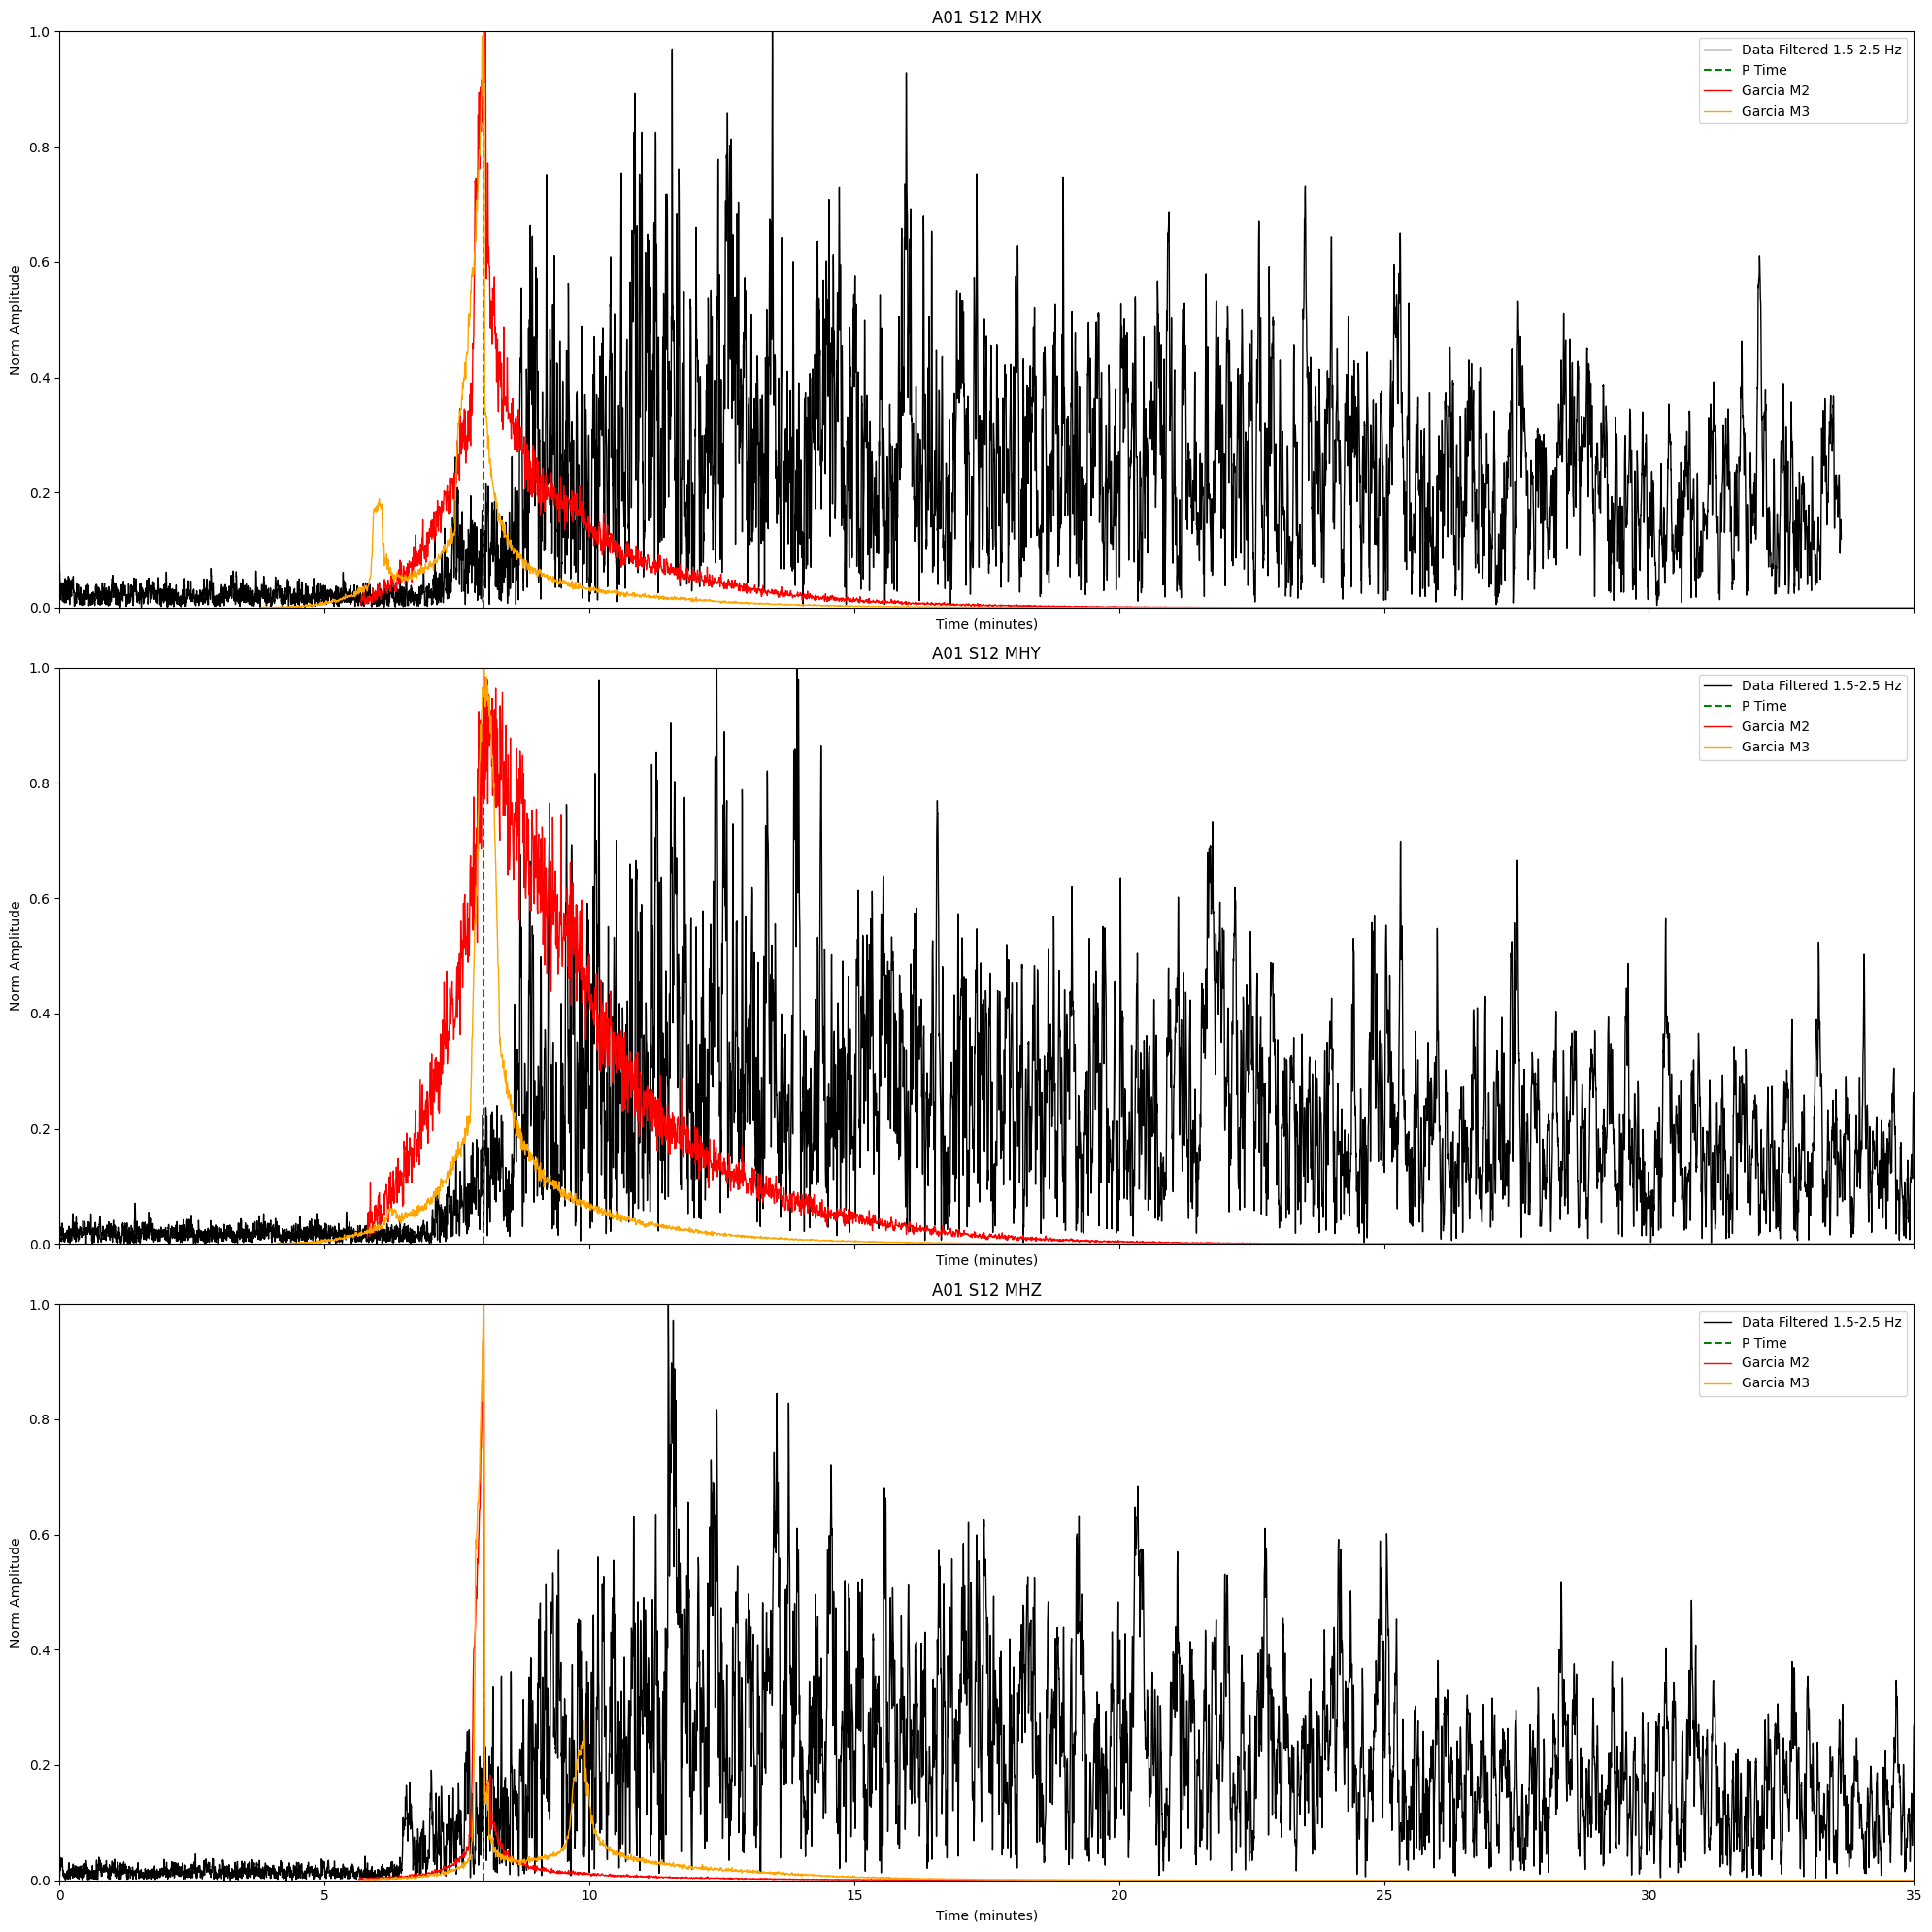

In [22]:
from obspy import read
from obspy.signal.filter import bandpass
import os
from scipy.signal import hilbert
import matplotlib.pyplot as plt
from obspy.core import UTCDateTime
homedir= '/home/seis/balthazar/Project_ANU/Project_radiative3D/'
def getDifftime(paths,source_id,station_id,df):
    """
    Get the difference time between the source and station.
    
    Parameters:
    - source_id: ID of the source
    - station_id: ID of the station
    - df: DataFrame containing the reference times
    
    Returns:
    - diff: Difference time in minutes
    """
    stream = read(paths[0])
    tr = stream[0]
    t1= tr.stats.starttime
    print(t1)
    # Get the reference time for the source and station
    ref_hours, ref_minutes, ref_seconds = df.loc[source_id, ['Ref_Hours', 'Ref_Minutes', 'Ref_Seconds']]
    ref_hours = int(ref_hours)
    ref_minutes = int(ref_minutes)
    ref_seconds = int(ref_seconds)
    year = int(tr.stats.starttime.year)
    month = int(tr.stats.starttime.month)
    day = int(tr.stats.starttime.day)
    reftime = UTCDateTime(year, month, day, ref_hours, ref_minutes, ref_seconds)
    print(reftime,t1)
    diff = np.abs((t1 - reftime)) / 60
    print(diff)
    return diff

def moving_average(data, window_size):
    """
    Compute the moving average of a 1D array.
    
    Parameters:
    - data: 1D array of data
    - window_size: Size of the moving window
    
    Returns:
    - smoothed_data: Smoothed data
    """
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')
def getEnvelope(data, smooth_nb):
    """
    Compute the envelope of a 1D array.
    """
    # Compute the envelope using the Hilbert transform
    analytic_signal = np.abs(hilbert(data))
    # Smooth the envelope
    smoothed_envelope = moving_average(analytic_signal, smooth_nb)
    return smoothed_envelope
def plotEnvelope(Id, Station,df, f1, f2):
    """
    Plot the envelope of the data.
    
    Parameters:
    - Id: ID of the source
    - Station: ID of the station
    - paths: List of file paths for the data
    - f1: Lower frequency for bandpass filter
    - f2: Upper frequency for bandpass filter
    """
    
    IdPath = f'{Id[0] + Id[1:].lstrip("0")}'
    st= os.listdir(f'{homedir}/Lognonne_et_al_2003_deep_moonquake_stacks/{IdPath}/{Station}')[0]
    pathX= f'{homedir}/Lognonne_et_al_2003_deep_moonquake_stacks/{IdPath}/{Station}/{st}/Lognonne_et_al_2003.{IdPath}.{Station}.{st}.MHX'
    pathY= f'{homedir}/Lognonne_et_al_2003_deep_moonquake_stacks/{IdPath}/{Station}/{st}/Lognonne_et_al_2003.{IdPath}.{Station}.{st}.MHY'
    pathZ= f'{homedir}/Lognonne_et_al_2003_deep_moonquake_stacks/{IdPath}/{Station}/{st}/Lognonne_et_al_2003.{IdPath}.{Station}.{st}.MHZ'
    paths = [pathX, pathY, pathZ]
    arrival_time = df.loc[Id, Station]/60
    print(f'Arrival time: {arrival_time} min')
    
        # Read data from files
    data = [read(path)[0] for path in paths]

    data_filt = [bandpass(tr.data, freqmin=f1, freqmax=f2, df=tr.stats.sampling_rate, corners=4, zerophase=True) for tr in data]
    smooth_nb=1
    data_envelope = [getEnvelope(tr.data, smooth_nb) for tr in data]

    diff = getDifftime(paths,Id, Station, df)

    times = [np.arange(0, len(tr.data) / tr.stats.sampling_rate, 1 / tr.stats.sampling_rate) for tr in data]
    times =[moving_average(t, smooth_nb) for t in times]
    fig, ax= plt.subplots(3, 1, figsize=(20, 20), sharex=True)
    for i, (tr_filt, time) in enumerate(zip( data_envelope, times)):
        ax[i].plot(time/60, tr_filt / np.max(tr_filt), label=f'Data Filtered {f1}-{f2} Hz', color='k',linewidth=1)
        ax[i].vlines(x=diff + arrival_time, ymin=0, ymax=1, color='g', linestyle='--', label='P Time')
        ax[i].set_ylabel('Norm Amplitude')
        ax[i].legend()
        ax[i].set_title(f'{Id} {Station} {data[i].stats.channel}')
        ax[i].set_xlabel('Time (minutes)')
        ax[i].set_xlim(0, 35)
    plt.tight_layout()
    
    return fig, ax, arrival_time+diff
    
    
f1=1.5
f2=2.5
Id= 'A01'

fig,ax,tref,=plotEnvelope(Id, 'S12',df, f1, f2)

for i in range(3):
    data=metadata['EnergyXYZ'][i,:]
    data/=np.max(data)
    data2=metadata2['EnergyXYZ'][i,:]
    data2/=np.max(data2)
    component = ['R', 'T', 'Z'][i]
    
    tmax1 = time[data.argmax()]/60
    tmax2 = time[data2.argmax()]/60
    
    ax[i].plot(time/60+tref -tmax1, data, label='Garcia M2', color='r', linewidth=1)
    ax[i].plot(time/60+tref-tmax2, data2, label='Garcia M3', color='orange', linewidth=1)
    ax[i].legend()
    ax[i].set_ylabel('Norm Amplitude')
    ax[i].set_xlabel('Time (minutes)')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(0, 35)
    #ax[i].set_title(f'{Id} {Station} {component}')
plt.xlabel('Time (minutes)')
plt.tight_layout()

### Plot the synthetics for one station

Read metadata from file:/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-165429-spherical-moon-R3D-M2-A01/seisfiles/seis_000_asc.dat.pkl
Read metadata from file:/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-170857-spherical-moon-R3D-M3-A01/seisfiles/seis_000_asc.dat.pkl


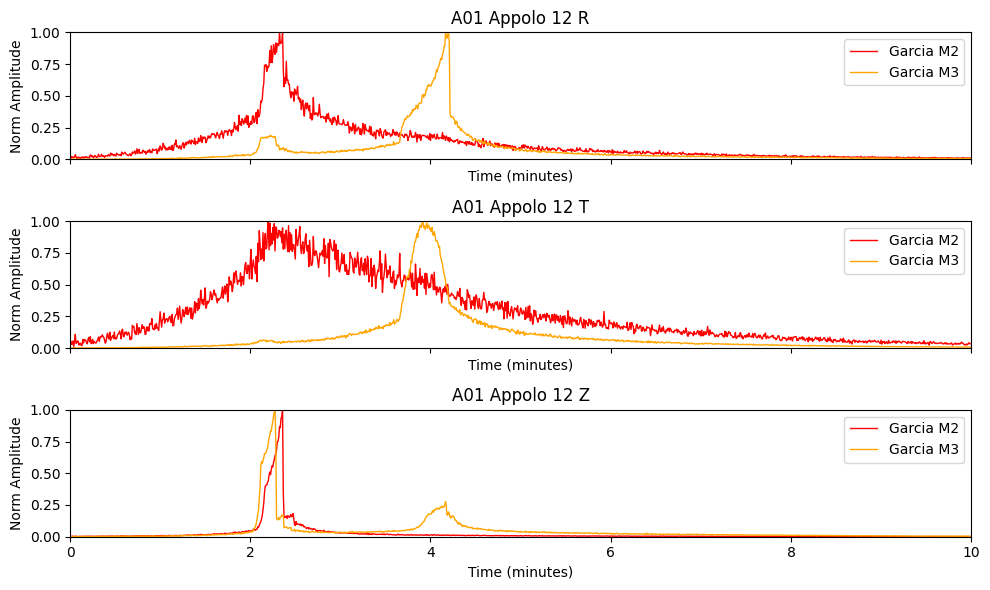

In [81]:
import pickle
Directory='/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-165429-spherical-moon-R3D-M2-A01'
Directory2='/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-170857-spherical-moon-R3D-M3-A01'
SeisName='seis_000_asc.dat'

#/Users/balthazar/Radiative3d-spherical-shells/data/Parallel-runs/20250320-114122-spherical-python-R3D/process_11/seisfiles
#merge_traces(Directory,SeisName,NCore)

# Write a function that reads the metadata file and plots the trace

def read_metadata(metadata_file):
    with open(metadata_file, 'rb') as f:
        metadata = pickle.load(f)
    print('Read metadata from file:' + metadata_file)
    return metadata

metadata=read_metadata(f'{Directory}/seisfiles/seis_000_asc.dat.pkl')
metadata2=read_metadata(f'{Directory2}/seisfiles/seis_000_asc.dat.pkl')
dt = metadata['binSize']
numbins = metadata['numBin']
time = metadata['TimeAxis']
fig,ax= plt.subplots(3, 1, figsize=(10, 6), sharex=True)
for i in range(3):
    data=metadata['EnergyXYZ'][i,:]
    data/=np.max(data)
    data2=metadata2['EnergyXYZ'][i,:]
    data2/=np.max(data2)
    component = ['R', 'T', 'Z'][i]
    
    tmax1 = time[data.argmax()]/60
    tmax2 = time[data2.argmax()]/60
    
    ax[i].plot(time/60, data, label='Garcia M2', color='r', linewidth=1)
    ax[i].plot(time/60, data2, label='Garcia M3', color='orange', linewidth=1)
    ax[i].legend()
    ax[i].set_ylabel('Norm Amplitude')
    ax[i].set_xlabel('Time (minutes)')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(0, 10)
    ax[i].set_title(f'A01 Appolo 12 {component}')
plt.xlabel('Time (minutes)')
plt.tight_layout()

### Plot the Appolo stations on the same fig (Z comp) 

Read metadata from file:/home/seis/balthazar/Project_ANU/Project_radiative3D/20250523-165202-spherical-moon-R3D-M3-A01/seisfiles/seis_000_asc.dat.pkl
Read metadata from file:/home/seis/balthazar/Project_ANU/Project_radiative3D/20250523-165202-spherical-moon-R3D-M3-A01/seisfiles/seis_002_asc.dat.pkl
Read metadata from file:/home/seis/balthazar/Project_ANU/Project_radiative3D/20250523-165202-spherical-moon-R3D-M3-A01/seisfiles/seis_006_asc.dat.pkl
Read metadata from file:/home/seis/balthazar/Project_ANU/Project_radiative3D/20250523-165202-spherical-moon-R3D-M3-A01/seisfiles/seis_004_asc.dat.pkl
Read metadata from file:/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-170857-spherical-moon-R3D-M3-A01/seisfiles/seis_000_asc.dat.pkl
Read metadata from file:/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-170857-spherical-moon-R3D-M3-A01/seisfiles/seis_002_asc.dat.pkl
Read metadata from file:/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-170857-spheric

Text(0.5, 1.0, 'DMQ nest A01 at the Apollo stations for M2 and M3 models, MHZ component')

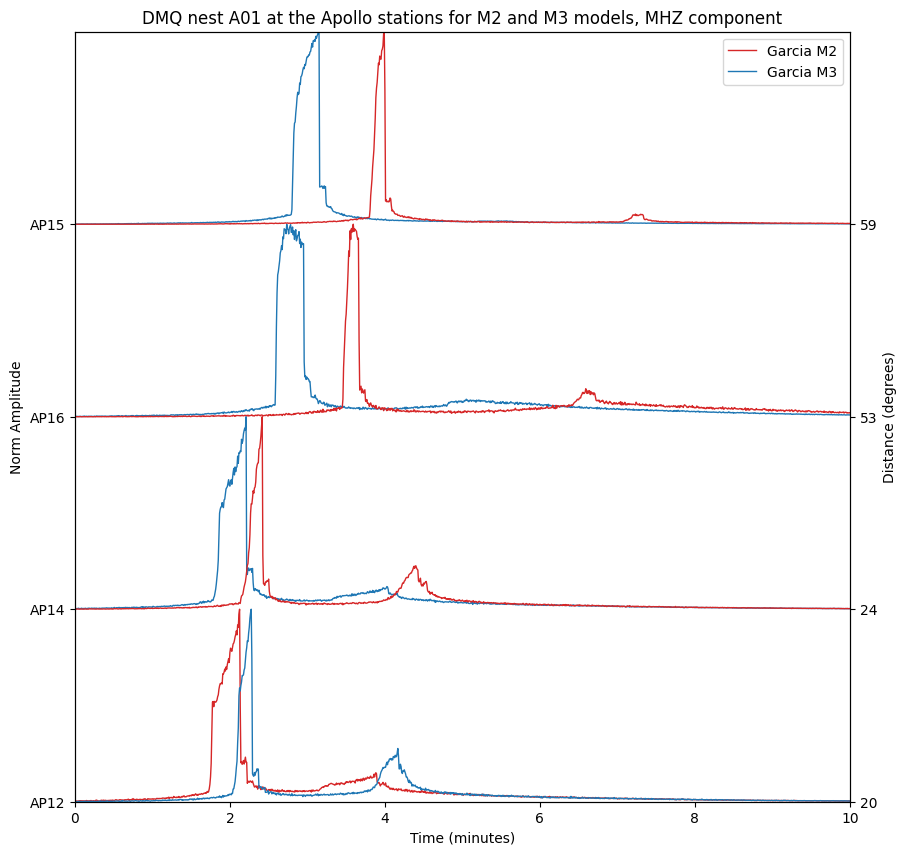

In [131]:
import pickle
Directory='/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-165429-spherical-moon-R3D-M2-A01'
Directory='/home/seis/balthazar/Project_ANU/Project_radiative3D/20250523-165202-spherical-moon-R3D-M3-A01'
Directory2='/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-170857-spherical-moon-R3D-M3-A01'
SeisName='seis_000_asc.dat'

#/Users/balthazar/Radiative3d-spherical-shells/data/Parallel-runs/20250320-114122-spherical-python-R3D/process_11/seisfiles
#merge_traces(Directory,SeisName,NCore)

# Write a function that reads the metadata file and plots the trace

def read_metadata(metadata_file):
    with open(metadata_file, 'rb') as f:
        metadata = pickle.load(f)
    print('Read metadata from file:' + metadata_file)
    return metadata


M2_files = [f'{Directory}/seisfiles/seis_00{i}_asc.dat.pkl' for i in range(0,8,2)]
# Just change the order because APOLLO 16 is closer to A01 than APOLLO 12
last_M2 = M2_files[-1]
M2_files[-1] = M2_files[-2]
M2_files[-2] = last_M2
M3_files = [f'{Directory2}/seisfiles/seis_00{i}_asc.dat.pkl' for i in range(0,8,2)]
# Just change the order because APOLLO 16 is closer to A01 than APOLLO 12
last_M3 = M3_files[-1]
M3_files[-1] = M3_files[-2]
M3_files[-2] = last_M3
metadata= [read_metadata(f) for f in M2_files]
metadata2= [read_metadata(f) for f in M3_files]



dt = metadata[0]['binSize']
numbins = metadata[0]['numBin']
time = metadata[0]['TimeAxis']

#Read the APXX files, the distance is saved in the file :

file_AP12 = '/home/seis/balthazar/Project_ANU/Project_radiative3D/AP12.txt'
file_AP14 = '/home/seis/balthazar/Project_ANU/Project_radiative3D/AP14.txt'
file_AP15 = '/home/seis/balthazar/Project_ANU/Project_radiative3D/AP15.txt'
file_AP16 = '/home/seis/balthazar/Project_ANU/Project_radiative3D/AP16.txt'
data_AP12 = np.genfromtxt(file_AP12, dtype=None, encoding=None, names=['label', 'v1', 'v2', 'v3'])
data_AP14 = np.genfromtxt(file_AP14, dtype=None, encoding=None, names=['label', 'v1', 'v2', 'v3'])
data_AP15 = np.genfromtxt(file_AP15, dtype=None, encoding=None, names=['label', 'v1', 'v2', 'v3'])
data_AP16 = np.genfromtxt(file_AP16, dtype=None, encoding=None, names=['label', 'v1', 'v2', 'v3'])
# First line is the header, first row is the source, third column is the distance (range km)

fig,ax= plt.subplots(1, 1, figsize=(10, 10), sharex=True)
for i in range(4): #loop over the 4 appolo stations, Z component
    data=metadata[i]['EnergyXYZ'][2,:]
    data/=np.max(data)
    data2=metadata2[i]['EnergyXYZ'][2,:]
    data2/=np.max(data2)
    component = ['R']
    
    tmax1 = time[data.argmax()]/60
    tmax2 = time[data2.argmax()]/60
    if i==0:
        ax.plot(time/60, data + 1*i, label='Garcia M2', color='tab:red', linewidth=1)
        ax.plot(time/60, data2 + 1*i, label='Garcia M3', color='tab:blue', linewidth=1)
    else:
        ax.plot(time/60, data + 1*i, color='tab:blue', linewidth=1)
        ax.plot(time/60, data2 + 1*i, color='tab:red', linewidth=1)
    ax.legend()
    ax.set_ylabel('Norm Amplitude')
    ax.set_xlabel('Time (minutes)')
    ax.set_ylim(0, 4)
    ax.set_xlim(0, 10)    
    
moon_radius = 1737.100  # in km
ax.set_yticks([0,1,2,3],['AP12', 'AP14', 'AP16', 'AP15'])
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
distances = [data_AP12['v2'][0], data_AP14['v2'][0], data_AP15['v2'][0], data_AP16['v2'][0]]
distances = [int((d / moon_radius)*(180/np.pi)) for d in distances]  # Convert to km
last_distance = distances[-1]   
distances[-1] = distances[-2]
distances[-2] = last_distance

ax2.set_yticks([0,1,2,3], distances)
#ax2.set_yticklabels(distances)
ax2.set_ylabel("Distance (degrees)")
plt.title('DMQ nest A01 at the Apollo stations for M2 and M3 models, MHZ component')

# Plot the model

/tmp/ipykernel_390235/4131562677.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap(cmap)


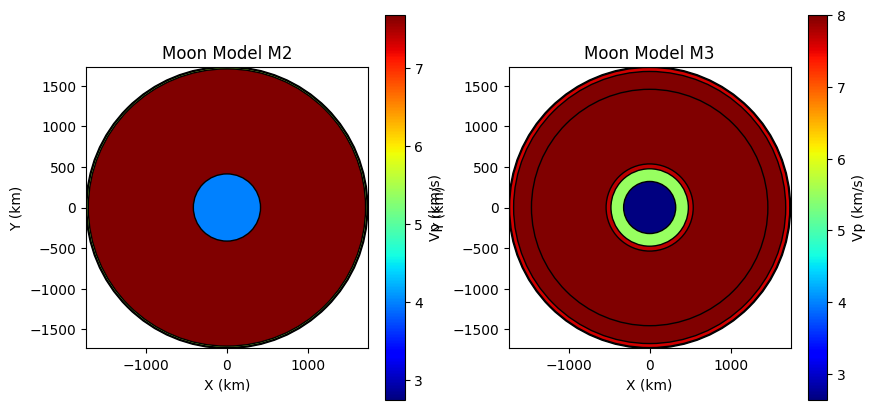

In [134]:
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
def read_gridgeom(gridfile):
    with open(gridfile, 'r') as f:
        lines = f.readlines()

    # Skip header lines until we reach the data
    data_lines = []
    for line in lines:
        if line.strip() == '' or line.strip().startswith('#'):
            continue
        if len(line.strip().split()) >= 15:  # assuming 15 columns in data lines
            data_lines.append(line)

    # Now load the actual grid data into a numpy array
    GG_Raw = np.loadtxt(data_lines)

    ibase = 0
    NX = int(np.max(GG_Raw[:, 0]) - ibase + 1)
    NY = int(np.max(GG_Raw[:, 1]) - ibase + 1)
    NZ = int(np.max(GG_Raw[:, 2]) - ibase + 1)

    GG = np.zeros((NX, NY, NZ, 4))

    for j in range(GG_Raw.shape[0]):
        ix = int(GG_Raw[j, 0] - ibase)
        iy = int(GG_Raw[j, 1] - ibase)
        iz = int(GG_Raw[j, 2] - ibase)
        GG[ix, iy, iz, 0] = GG_Raw[j, 3]  # X
        GG[ix, iy, iz, 1] = GG_Raw[j, 4]  # Y
        GG[ix, iy, iz, 2] = GG_Raw[j, 5]  # Z
        GG[ix, iy, iz, 3] = GG_Raw[j, 6]  # Vp

    return GG
def plot_earth_layers_vp(grid, ax, planet_radius=1737.1, cmap='jet', model='M2',**kwargs):
    """
    Plots radial layers colored by Vp values.

    Parameters:
        grid (ndarray): The Earth model grid with shape (NX, NY, NZ, 3+).
        ax (matplotlib axis): Axis to plot on.
        planet_radius (float): The radius of the planet/moon.
        cmap (str): Matplotlib colormap name.
    """
    # Extract unique depths and corresponding Vp values
    depths, indices = np.unique(grid[0, 0, :, 2], return_index=True)
    vp_values = grid[0, 0, indices, 3]  # Vp values at those depths

    # Convert depth to radius
    radii = planet_radius - np.abs(depths)

    # Create a colormap
    norm = Normalize(vmin=np.min(vp_values), vmax=np.max(vp_values))
    colormap = cm.get_cmap(cmap)

    # Sort radii and vp descending so larger circles drawn first
    sort_indices = np.argsort(radii)[::-1]
    radii = radii[sort_indices]
    vp_values = vp_values[sort_indices]

    ax.set_aspect('equal')
    ax.set_xlim([-planet_radius, planet_radius])
    ax.set_ylim([-planet_radius, planet_radius])

    for radius, vp in zip(radii, vp_values):
        color = colormap(norm(vp))
        circle = plt.Circle((0, 0), radius,
                            edgecolor='black', facecolor=color, lw=1, **kwargs)
        ax.add_artist(circle)

    ax.set_title(f"Moon Model {model}")
    ax.set_xlabel("X (km)")
    ax.set_ylabel("Y (km)")

    # Add colorbar
    sm = cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Vp (km/s)')
    
file = '/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-165429-spherical-moon-R3D-M2-A01/process_2/griddump.txt'
file2 ='/home/seis/balthazar/Project_ANU/Project_radiative3D/20250522-170857-spherical-moon-R3D-M3-A01/griddump.txt'
GG=read_gridgeom(file)
GG2=read_gridgeom(file2)
fig,ax=plt.subplots(1,2,figsize=(10,5))

plot_earth_layers_vp(GG,ax[0],model='M2')
plot_earth_layers_vp(GG2,ax[1],model='M3')
plt.show()